In [1]:
import cv2
import matplotlib.pyplot as plt
from facexlib.detection import init_detection_model

In [2]:
face_detector = init_detection_model(
    model_name="retinaface_mobile0.25",
    half=True,
    device="cuda"
)

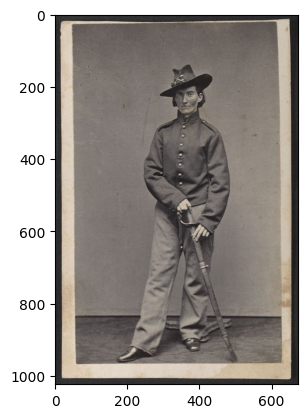

In [3]:
img_path = "../images/source/face.jpg"
img = cv2.imread(img_path, cv2.IMREAD_COLOR_RGB)
plt.imshow(img)
plt.show()

In [4]:
faces = face_detector.detect_faces(
    image=img,
    conf_threshold=0.8
)
faces

array([[330.71484  , 190.88184  , 399.15234  , 271.50684  ,   0.9970703,
        341.96872  , 223.07812  , 372.6172   , 221.90625  , 352.97656  ,
        241.6875   , 347.21872  , 253.20312  , 371.67184  , 251.96875  ]],
      dtype=float32)

In [5]:
faces[0]

array([330.71484  , 190.88184  , 399.15234  , 271.50684  ,   0.9970703,
       341.96872  , 223.07812  , 372.6172   , 221.90625  , 352.97656  ,
       241.6875   , 347.21872  , 253.20312  , 371.67184  , 251.96875  ],
      dtype=float32)

1 face(s) detected
(330, 190), (399, 271) → 0.9970703125


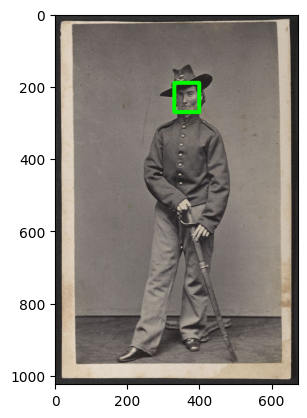

In [6]:
if img is not None:
    if faces.size != 0:
        print(f"{len(faces)} face(s) detected")
    else:
        print(f"No faces detected")

    # face bounding boxes
    for face in faces:
        x1, y1, x2, y2 = map(int, face[:4])
        conf = face[4]
        print(f"({x1}, {y1}), ({x2}, {y2}) → {conf}")
        cv2.rectangle(
            img=img,
            pt1=(x1, y1),
            pt2=(x2, y2),
            color=(0, 255, 0),
            thickness=int(0.01*img.shape[0])
        )

    plt.imshow(img)
    plt.show()